In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [30]:
data1=pd.read_csv('calories.csv')

In [31]:
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [32]:
data=pd.read_csv('exercise.csv')

In [33]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [34]:
data=pd.concat([data,data1['Calories']],axis=1)

In [35]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [36]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<AxesSubplot:>

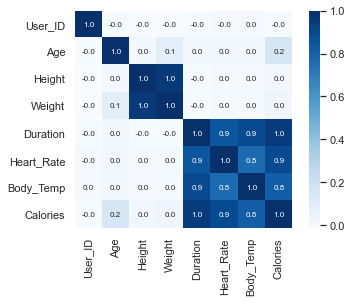

In [37]:
correlation=data.corr()
plt.figure()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='Blues')

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


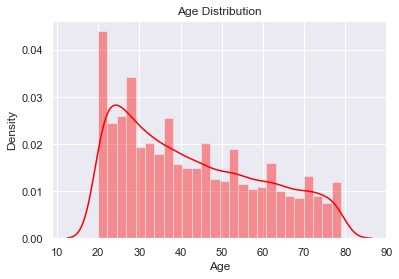

In [38]:
sns.set()
plt.figure()
sns.distplot(data.Age,color='red')
plt.title('Age Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


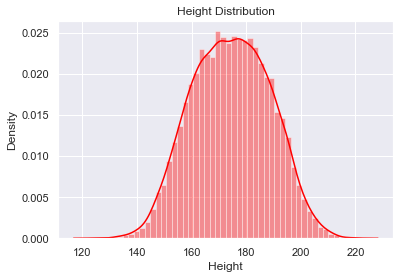

In [39]:
plt.figure()
sns.distplot(data.Height,color='red')
plt.title('Height Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


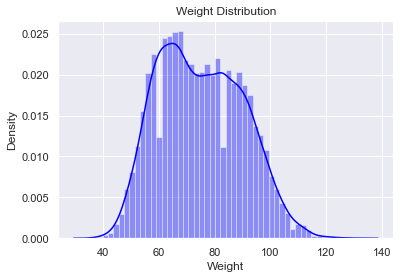

In [40]:
plt.figure()
sns.distplot(data.Weight,color='blue')
plt.title('Weight Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


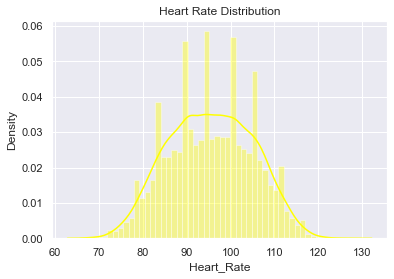

In [41]:
plt.figure()
sns.distplot(data.Heart_Rate,color='yellow')
plt.title('Heart Rate Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


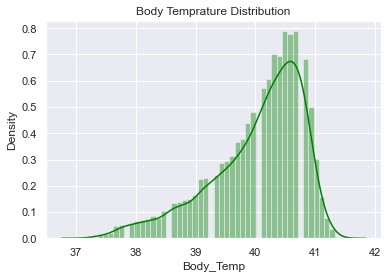

In [42]:
plt.figure()
sns.distplot(data.Body_Temp,color='green')
plt.title('Body Temprature Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


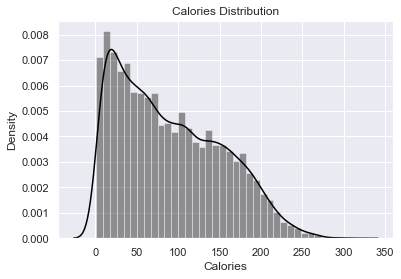

In [43]:
plt.figure()
sns.distplot(data.Calories,color='black')
plt.title('Calories Distribution')
plt.show()

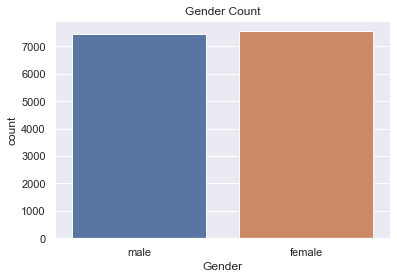

In [44]:
plt.figure()
sns.countplot(x='Gender',data=data)
plt.title('Gender Count')
plt.show()

In [45]:
data.replace({'Gender':{'female':0,'male':1}},inplace=True)

In [46]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [47]:
X=data.drop(['Calories','User_ID'],axis=1)

In [48]:
Y=data['Calories']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [51]:
model=XGBRegressor()

In [52]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
predictedTrain=model.predict(X_train)
error2=metrics.r2_score(Y_train,predictedTrain)
print("R square error: ",error2)

predictedTest=model.predict(X_test)
error4=metrics.r2_score(Y_test,predictedTest)
print("R square error: ",error4)


R square error:  0.9995517443430838
R square error:  0.9988455491362879


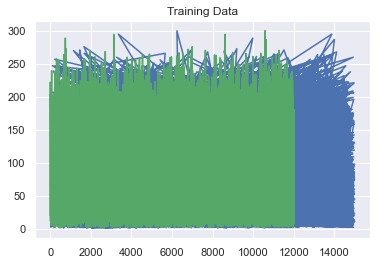

In [54]:
plt.plot(Y_train,color='b',label='Actual Price')
plt.plot(predictedTrain,color='g',label='Predicted Price')
plt.title('Training Data')
plt.show()


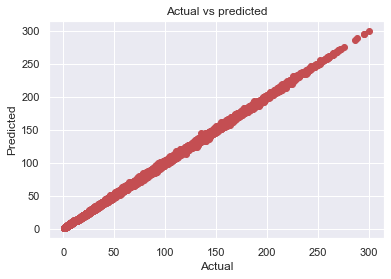

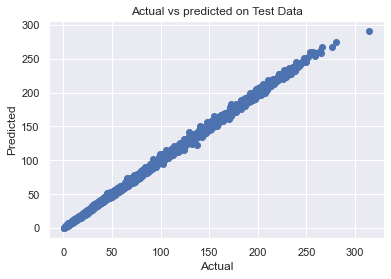

In [55]:
plt.scatter(Y_train,predictedTrain,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

plt.scatter(Y_test,predictedTest,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()

These lines are almost straight which represents the model perform very well